# Check `GDS` Python stack

This notebook checks all software requirements for the course Geographic Data Science are correctly installed. 

A successful run of the notebook implies no errors returned in any cell *and* every cell beyond the first one returning a printout of `True`. This ensures a correct environment installed.

In [1]:
import black

In [2]:
import bokeh

In [3]:
import cenpy

In [4]:
import colorama

In [5]:
import contextily

In [6]:
import cython

In [7]:
import dask

In [8]:
import dask_ml

In [9]:
import datashader

In [10]:
import dill

In [11]:
import geopandas

In [12]:
import geopy

In [13]:
import hdbscan

In [14]:
import ipyleaflet

In [15]:
import ipyparallel

In [16]:
import ipywidgets

In [17]:
import mplleaflet

In [18]:
import nbdime

In [19]:
import networkx

In [20]:
import osmnx

In [21]:
import palettable

In [22]:
import pandana

In [23]:
import polyline

In [24]:
try:
    import pygeoda
except:
    import warnings
    warnings.warn("pygeoda not installed. This may be "\
                  "because the check it's not running on the "\
                  "official container")

In [25]:
import pysal

In [26]:
import qgrid

In [27]:
import rasterio

In [28]:
import rasterstats

In [29]:
import skimage

In [30]:
import sklearn

In [31]:
import seaborn

In [32]:
import spatialpandas

In [33]:
import statsmodels

In [34]:
import urbanaccess

In [35]:
import xlrd

In [36]:
import xlsxwriter

---

**Legacy checks** (in some ways superseded by those above but in some still useful)

In [37]:
import bokeh as bk
float(bk.__version__[:1]) >= 1

True

In [38]:
import matplotlib as mpl
float(mpl.__version__[:3]) >= 1.5

True

In [39]:
import mplleaflet as mpll

In [40]:
import seaborn as sns
float(sns.__version__[:3]) >= 0.6

False

In [41]:
import datashader as ds
float(ds.__version__[:3]) >= 0.6

False

In [42]:
import palettable as pltt
float(pltt.__version__[:3]) >= 3.1

True

In [43]:
sns.palplot(pltt.matplotlib.Viridis_10.hex_colors)

---

In [44]:
import pandas as pd
float(pd.__version__[:3]) >= 1

True

In [45]:
import dask
float(dask.__version__[:1]) >= 1

True

In [46]:
import sklearn
float(sklearn.__version__[:4]) >= 0.20

True

In [47]:
import statsmodels.api as sm
float(sm.__version__[2:4]) >= 10

True

---

In [48]:
import fiona
float(fiona.__version__[:3]) >= 1.8

True

In [49]:
import geopandas as gpd
float(gpd.__version__[:3]) >= 0.4

True

In [50]:
import pysal as ps
float(ps.__version__[:1]) >= 2

True

In [51]:
import rasterio as rio
float(rio.__version__[:1]) >= 1

True

# Test

In [52]:
shp = pysal.lib.examples.get_path('columbus.shp')
db = geopandas.read_file(shp)
db.head()

,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,...,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry
0,0.309441,2.440629,2,5,1,5,80.467003,19.531,15.725980,2.850747,...,5.03,38.799999,44.070000,1.0,1.0,1.0,0.0,1000.0,1005.0,"POLYGON ((8.62413 14.23698, 8.55970 14.74245, ..."
1,0.259329,2.236939,3,1,2,1,44.567001,21.232,18.801754,5.296720,...,4.27,35.619999,42.380001,1.0,1.0,0.0,0.0,1000.0,1001.0,"POLYGON ((8.25279 14.23694, 8.28276 14.22994, ..."
2,0.192468,2.187547,4,6,3,6,26.350000,15.956,30.626781,4.534649,...,3.89,39.820000,41.180000,1.0,1.0,1.0,0.0,1000.0,1006.0,"POLYGON ((8.65331 14.00809, 8.81814 14.00205, ..."
3,0.083841,1.427635,5,2,4,2,33.200001,4.477,32.387760,0.394427,...,3.70,36.500000,40.520000,1.0,1.0,0.0,0.0,1000.0,1002.0,"POLYGON ((8.45950 13.82035, 8.47341 13.83227, ..."
4,0.488888,2.997133,6,7,5,7,23.225000,11.252,50.731510,0.405664,...,2.83,40.009998,38.000000,1.0,1.0,1.0,0.0,1000.0,1007.0,"POLYGON ((8.68527 13.63952, 8.67758 13.72221, ..."


In [53]:
db[['AREA', 'PERIMETER']].to_feather('db.feather')
tst = pd.read_feather('db.feather')
! rm db.feather

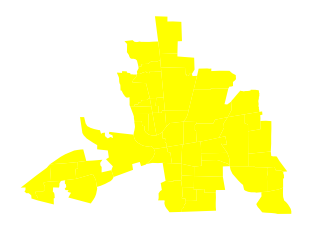

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(1)
db.plot(facecolor='yellow', ax=ax)
ax.set_axis_off()
plt.show()

In [55]:
db.crs = 'EPSG:26918'

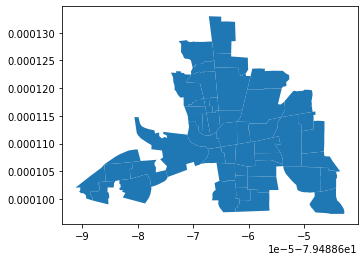

In [56]:
db_wgs84 = db.to_crs(epsg=4326)
db_wgs84.plot()
plt.show()

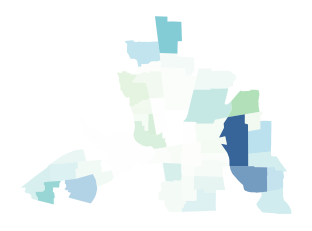

In [57]:
from pysal.viz import splot
from splot.mapping import vba_choropleth

f, ax = vba_choropleth(db['INC'], db['HOVAL'], db)

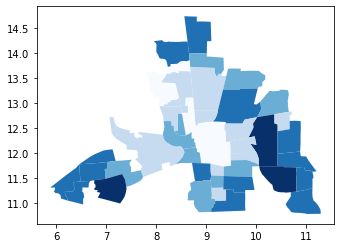

In [58]:
db.plot(column='INC', scheme='fisher_jenks', cmap=plt.matplotlib.cm.Blues)
plt.show()

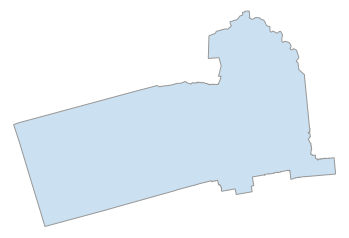

In [59]:
city = osmnx.gdf_from_place('Berkeley, California')
osmnx.plot_shape(osmnx.project_gdf(city));

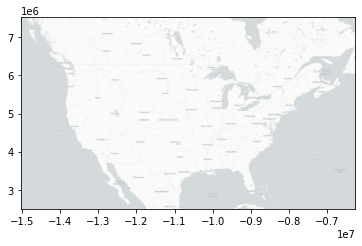

In [60]:
import numpy as np
import contextily as ctx
tl = ctx.providers.CartoDB.Positron

db = geopandas.read_file(ps.lib.examples.get_path('us48.shp'))
db.crs = "EPSG:4326"
dbp = db.to_crs(epsg=3857)
w, s, e, n = dbp.total_bounds
# Download raster
_ = ctx.bounds2raster(w, s, e, n, 'us.tif', url=tl)
# Load up and plot
source = rio.open('us.tif', 'r')
red = source.read(1)
green = source.read(2)
blue = source.read(3)
pix = np.dstack((red, green, blue))
bounds = (source.bounds.left, source.bounds.right, \
          source.bounds.bottom, source.bounds.top)
f = plt.figure(figsize=(6, 6))
ax = plt.imshow(pix, extent=bounds)

! rm us.tif

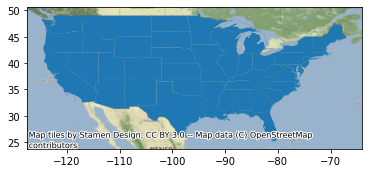

In [61]:
ax = db.plot()
ctx.add_basemap(ax, crs=db.crs.to_string())

In [62]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, SplitMapControl

m = Map(center=(42.6824, 365.581), zoom=5)

right_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2017-11-11")
left_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisAquaBands721CR, "2017-11-11")

control = SplitMapControl(left_layer=left_layer, right_layer=right_layer)
m.add_control(control)

m

Map(center=[42.6824, 365.581], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [ ]:
from IPython.display import GeoJSON

GeoJSON({
    "type": "Feature",
    "geometry": {
        "type": "Point",
        "coordinates": [-118.4563712, 34.0163116]
    }
})